In [29]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [97]:
### Interpreting Coefficients, Stats Model OLS ###
from statsmodels.api import OLS
grad = pd.read_csv('Feature_Target_Data.csv')
years = [2011, 2012, 2013, 2014]
grad = grad.loc[grad['Year'].isin(years)]
grad = grad[grad.columns[3:]]
X = grad[grad.columns[:-1]]
y = grad[grad.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
olsreg = OLS(y_train, X_train)
olsreg = olsreg.fit()
print(olsreg.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Graduated 4-Year (%)   R-squared (uncentered):                   0.960
Model:                              OLS   Adj. R-squared (uncentered):              0.959
Method:                   Least Squares   F-statistic:                              794.8
Date:                  Sun, 15 Mar 2020   Prob (F-statistic):                   1.74e-267
Time:                          15:06:36   Log-Likelihood:                         -1437.9
No. Observations:                   406   AIC:                                      2900.
Df Residuals:                       394   BIC:                                      2948.
Df Model:                            12                                                  
Covariance Type:              nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]


In [98]:
### Studying Effects of Dropping Certain Features Due to Multicollinearity/Domain Insignificance ###
grad = grad.drop(['AP-Total Exams', 'Enrolled 4-Year', 'Total Graduated', 'AP-11&12 Participating Students', 'SAT-Total', 'Wealth/ADA'], axis=1)
X = grad[grad.columns[:-1]]
y = grad[grad.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
olsreg = OLS(y_train, X_train)
olsreg = olsreg.fit()
print(olsreg.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Graduated 4-Year (%)   R-squared (uncentered):                   0.959
Model:                              OLS   Adj. R-squared (uncentered):              0.958
Method:                   Least Squares   F-statistic:                              1544.
Date:                  Sun, 15 Mar 2020   Prob (F-statistic):                   4.71e-273
Time:                          15:06:41   Log-Likelihood:                         -1446.6
No. Observations:                   406   AIC:                                      2905.
Df Residuals:                       400   BIC:                                      2929.
Df Model:                             6                                                  
Covariance Type:              nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----

In [125]:
########## Linear Regression Model for Predicting Graduated 4-Year (%) ############

### USING DIFFERENT RANDOM STATES AND DIFFERENT TEST SPLITS ####

### ALL Features ###
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

for test_size in [.275, .25, .225, .2]:
    rmse_all = []
    r2_all = []
    mape_all = []
    rmse_drop = []
    r2_drop = []
    mape_drop = []
    print('\n***Test Size: ', test_size, '***')
    for i in range(1000):
        grad = pd.read_csv('Feature_Target_Data.csv')
        years = [2011, 2012, 2013, 2014]
        grad = grad.loc[grad['Year'].isin(years)]
        grad = grad[grad.columns[3:]]
        X = grad.drop('Graduated 4-Year (%)', axis=1).values
        y = grad['Graduated 4-Year (%)'].values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
        linear_reg = LinearRegression()
        linear_reg.fit(X_train, y_train)
        y_pred_test = linear_reg.predict(X_test)
        y_pred_train = linear_reg.predict(X_train)
        rmse_all.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
        r2_all.append(linear_reg.score(X_test, y_test))
        mape_all.append(mean_absolute_percentage_error(y_test, y_pred_test))
        r2_max_index = r2_all.index(np.max(r2_all))        
        rmse_max_index = rmse_all.index(np.min(rmse_all))
        mape_max_index = mape_all.index(np.min(mape_all))
        ### After Dropping Features Causing Mulicollinearity ###
        X2 = grad.drop(['Graduated 4-Year (%)', 'AP-Total Exams', 'Enrolled 4-Year', 'Total Graduated', 'AP-11&12 Participating Students', 'SAT-Total', 'Wealth/ADA'], axis=1).values
        y2 = grad['Graduated 4-Year (%)'].values
        X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=test_size, random_state=i)
        linear_reg = LinearRegression()
        linear_reg.fit(X_train2, y_train2)
        y_pred_test2 = linear_reg.predict(X_test2)
        y_pred_train2 = linear_reg.predict(X_train2)
        rmse_drop.append(np.sqrt(mean_squared_error(y_test2, y_pred_test2)))
        r2_drop.append(linear_reg.score(X_test2, y_test2))
        mape_drop.append(mean_absolute_percentage_error(y_test2, y_pred_test2))
        r2_max_index2 = r2_drop.index(np.max(r2_drop))        
        rmse_max_index2 = rmse_drop.index(np.min(rmse_drop))
        mape_max_index2 = mape_drop.index(np.min(mape_drop))
    print('*All Features: Performance on Test Set*')
    print('\nAverage Results from different Random States:')
    print('RMSE: ', np.mean(rmse_all), 'r2: ', np.mean(r2_all), 'MAPE: ', np.mean(mape_all))
    print('\nBest RMSE: ', rmse_all[rmse_max_index], 'Random State: ', rmse_max_index)
    print('Best r2: ', r2_all[r2_max_index], 'Random State: ', r2_max_index)
    print('Best MAPE: ', mape_all[mape_max_index], 'Random State: ', mape_max_index)

    print('\n*After Dropping Features: Performance on Test Set*')
    print('\nAverage Results from different Random States:')
    print('RMSE: ', np.mean(rmse_drop), 'r2: ', np.mean(r2_drop), 'MAPE: ', np.mean(mape_drop))
    print('\nBest RMSE: ', rmse_drop[rmse_max_index2], 'Random State: ', rmse_max_index2)
    print('Best r2: ', r2_drop[r2_max_index2], 'Random State: ', r2_max_index2)
    print('Best MAPE: ', mape_drop[mape_max_index2], 'Random State: ', mape_max_index2)




***Test Size:  0.275 ***
*All Features: Performance on Test Set*

Average Results from different Random States:
RMSE:  8.024981633156637 r2:  0.5808002398725814 MAPE:  17.746177379426808

Best RMSE:  6.5780572094757215 Random State:  657
Best r2:  0.7024134573472549 Random State:  926
Best MAPE:  13.670654224423245 Random State:  178

*After Dropping Features: Performance on Test Set*

Average Results from different Random States:
RMSE:  8.134285510326231 r2:  0.5693447328370037 MAPE:  17.785877371894035

Best RMSE:  6.501762627984149 Random State:  319
Best r2:  0.7178792180167728 Random State:  319
Best MAPE:  13.453253962546366 Random State:  178

***Test Size:  0.25 ***
*All Features: Performance on Test Set*

Average Results from different Random States:
RMSE:  8.017852279775068 r2:  0.5806564816476749 MAPE:  17.71832721888505

Best RMSE:  6.38238954547272 Random State:  118
Best r2:  0.7024513998328827 Random State:  926
Best MAPE:  13.474187318294028 Random State:  178

*After 

In [137]:
#### Evaluating Ridge and Lasso Model Performance ####
### ALSO ADDING SCALER (Robust Gave Best Results) ###

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler, Normalizer, StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score


grad = pd.read_csv('Feature_Target_Data.csv')
years = [2011, 2012, 2013, 2014]
grad = grad.loc[grad['Year'].isin(years)]
grad = grad[grad.columns[3:]]
X = grad.drop('Graduated 4-Year (%)', axis=1).values
y = grad['Graduated 4-Year (%)'].values
linear_reg = LinearRegression()
steps = [('scaler', RobustScaler()), ('reg', LinearRegression())]
reg = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=639)
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)
print('Linear Regression')
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)), 'Testing RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('\nTraining R2: ', reg.score(X_train, y_train), 'Testing R2: ', reg.score(X_test, y_test))
print('\nTraining MAPE: ', mean_absolute_percentage_error(y_train, y_pred_train), 'Testing MAPE: ', mean_absolute_percentage_error(y_test, y_pred_test))



for regression_model in [Ridge(), Lasso()]:
    print('\n' + str(regression_model))
    steps = [('scaler', RobustScaler()), ('reg', regression_model)]
    pipeline = Pipeline(steps)
    params = {'reg__alpha': [.00001, .0001, .001, .01, .1]}
    reg = GridSearchCV(pipeline, param_grid=params, cv=5)
    reg.fit(X_train, y_train)
    y_pred_train = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    print('Training RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)), 'Testing RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print('\nTraining R2: ', reg.score(X_train, y_train), 'Testing R2: ', reg.score(X_test, y_test))
    print('\nTraining MAPE: ', mean_absolute_percentage_error(y_train, y_pred_train), 'Testing MAPE: ', mean_absolute_percentage_error(y_test, y_pred_test))


Linear Regression
Training RMSE: 8.205665471245794 Testing RMSE: 6.198273680955048

Training R2:  0.5754095033931913 Testing R2:  0.7441823938418588

Training MAPE:  18.109866126554923 Testing MAPE:  14.549309277352723

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Training RMSE: 8.205669056585874 Testing RMSE: 6.198721955015161

Training R2:  0.5754091323564576 Testing R2:  0.7441453898147055

Training MAPE:  18.109189420233786 Testing MAPE:  14.554301954466315

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Training RMSE: 8.2374949316565 Testing RMSE: 6.239775007211057

Training R2:  0.5721091744835733 Testing R2:  0.740745206829085

Training MAPE:  18.012894440793335 Testing MAPE:  14.813833443845095


In [199]:
####### RandomForestRegressor #########

from sklearn.ensemble import RandomForestRegressor
from rfpimp import permutation_importances

def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

grad = pd.read_csv('Feature_Target_Data.csv')
years = [2011, 2012, 2013, 2014]
grad = grad.loc[grad['Year'].isin(years)]
grad = grad[grad.columns[3:]]
X = grad.drop('Graduated 4-Year (%)', axis=1).values
y = grad['Graduated 4-Year (%)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=639)
rfr = RandomForestRegressor(n_estimators=1000, n_jobs=-1, oob_score=True)
rfr.fit(X_train, y_train)
fi = rf_feat_importance(rfr, grad[grad.columns[:-1]])
def plot_fi(fi): 
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
plot_fi(fi)
print('OOB Score', rfr.oob_score_, '\nWe will need to tune hyperparameters in an effort to increase this r2')
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)), 'Testing RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('\nTraining R2: ', rfr.score(X_train, y_train), 'Testing R2: ', rfr.score(X_test, y_test))
print('\nTraining MAPE: ', mean_absolute_percentage_error(y_train, y_pred_train), 'Testing MAPE: ', mean_absolute_percentage_error(y_test, y_pred_test))
print('\n\n____Feature Importance Plot_____')

perm_imp_rfpimp = permutation_importances(rf, X_train, y_train, r2)

ModuleNotFoundError: No module named 'rfpimp'

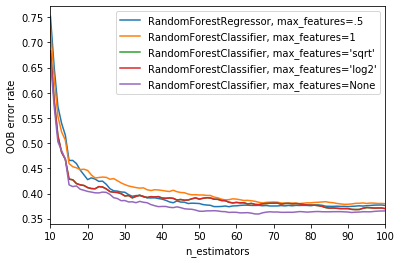

In [189]:
### OBB Errors, Max_Features #####
from collections import OrderedDict
import matplotlib.pyplot as plt

RANDOM_STATE = 639
ensemble_clfs = [
     ("RandomForestRegressor, max_features=.5",
        RandomForestRegressor(warm_start=True, oob_score=True,
                               max_features=.5,
                               random_state=RANDOM_STATE)),
     ("RandomForestClassifier, max_features=1",
        RandomForestRegressor(warm_start=True, oob_score=True,
                               max_features=1,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestRegressor(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestRegressor(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestRegressor(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))]
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
min_estimators = 10
max_estimators = 100
for label, rfr in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        rfr.set_params(n_estimators=i)
        rfr.fit(X, y)
        oob_error = 1 - rfr.oob_score_
        error_rate[label].append((i, oob_error))
for label, rfr_err in error_rate.items():
    xs, ys = zip(*rfr_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [197]:
### HyperParamter Tuning ###
from time import time
import math, pprint

def report_perf(optimizer, X, y, title):
    start = time()
    optimizer.fit(X, y)
    best_score = optimizer.best_score_
    best_score_std = optimizer.cv_results_['std_test_score'][optimizer.best_index_]
    best_params = optimizer.best_params_
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           +u"\u00B1"+" %.3f") % (time() - start, 
                                  len(optimizer.cv_results_['params']),
                                  best_score,
                                  best_score_std))    
    print('Best parameters:')
    pprint.pprint(best_params)
    print()
    return best_params,optimizer.best_estimator_

rfr = RandomForestRegressor(n_jobs=-1, random_state=639, criterion='mse', oob_score=True)
grid_search = GridSearchCV(rfr, 
                           param_grid={
                                       "n_estimators": [100, 200, 600, 1000],
                                       "min_samples_leaf": [5, 3, 2, 1],
                                       "max_features": ['sqrt', 'log2', .5, None]
                                       },
                           n_jobs=-1,
                           cv=10,
                           iid=False, # just return the average score across folds
                           return_train_score=False)

best_params,best_model = report_perf(grid_search, X_train, y_train,'GridSearchCV')

best_model.fit(X_train, y_train)
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)
print('\nOOB Score: ', best_model.oob_score_)
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)), 'Testing RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('\nTraining R2: ', best_model.score(X_train, y_train), 'Testing R2: ', best_model.score(X_test, y_test))
print('\nTraining MAPE: ', mean_absolute_percentage_error(y_train, y_pred_train), 'Testing MAPE: ', mean_absolute_percentage_error(y_test, y_pred_test))



GridSearchCV took 132.92 seconds,  candidates checked: 64, best CV score: 0.589 ± 0.059
Best parameters:
{'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 1000}


OOB Score:  0.6159060637474676
Training RMSE: 2.8688882320852103 Testing RMSE: 6.214637833657039

Training R2:  0.9480996947501069 Testing R2:  0.7428298351581777

Training MAPE:  6.390623021503118 Testing MAPE:  15.143943380490605
